# Execise Week 16 Estimation

Exercise I: In this chapter we used $\bar x$ and median to estimate µ, and found that $\bar x$ yields lower MSE. Also, we used $S^2$ and $S_{n-1}^2$
 to estimate σ, and found that $S^2$  is biased and $S_{n-1}^2$ unbiased. Run similar experiments to see if $\bar x$  and median are biased estimates of µ. Also check whether $S^2$ or $S_{n-1}^2$  yields a lower MSE.

In [1]:
import numpy as np
import random

In [2]:
def MSE(estimates, actual):
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return mse

In [3]:
# Experiment to see if xbar and median are biased estimates of mu

# m = number of time we work on data
# n = size of the sample
def Estimate(n=7, m=1000):
    mu = 0 
    sigma = 1
    means = []
    medians = []
    for _ in range(m):
        xs = [random.gauss(mu, sigma) for i in range(n)]  
        xbar = np.mean(xs)
        median = np.median(xs) 
        means.append(xbar) 
        medians.append(median) 
    print(f'sample mean:   {np.mean(means)}')
    print(f'sample median:   {np.median(medians)}')
    print(f'long term mean or distribution mean:  {mu} \n')
    
    print('mse xbar', MSE(means, mu))
    print('mse median', MSE(medians, mu))

In [4]:
Estimate()

sample mean:   0.008141121901174149
sample median:   0.019051095253900523
long term mean or distribution mean:  0 

mse xbar 0.13700445597398994
mse median 0.20609868542086288


In [5]:
# Check whether biased or unbiased variance yields a lower MSE
def Estimate_var(n=7, m=1000):
    mu = 0
    sigma = 1
    estimates1 = []
    estimates2 = []
    for _ in range(m):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        biased = np.var(xs)
        unbiased = np.var(xs, ddof=1)
        estimates1.append(biased)
        estimates2.append(unbiased)
    print(f'mean biased sample variance  {np.mean(biased)}')
    print(f'mean UNbiased sample variance  {np.mean(unbiased)} \n ')
    
    print('MSE biased', MSE(estimates1, sigma**2))
    print('MSE UNbiased', MSE(estimates2, sigma**2))

In [6]:
Estimate_var()

mean biased sample variance  1.5691931925480396
mean UNbiased sample variance  1.8307253913060462 
 
MSE biased 0.25698743222933956
MSE UNbiased 0.3244808402125382


Exercise II: Suppose you draw a sample with size n=9 from an exponential distribution with λ=3. Simulate this experiment 1500 times and plot the sampling distribution of the estimate L. Compute the standard error (RMSE) of the estimate and the 90% confidence interval.

Repeat the experiment with a few different values of n={20, 200, 800} and make a plot of standard error versus n.

In [18]:
import numpy as np
import random
import math
import scipy.stats as st
import matplotlib.pyplot as plt

import thinkstats2
import thinkplot

In [19]:
def RMSE(estimates, actual):
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return math.sqrt(mse)

In [20]:
def Estimate3(n, iters=1500):
    lam = 3

    means = []
    for _ in range(iters):
        xs = np.random.exponential(1.0/lam, n)
        L = 1 / np.mean(xs)
        means.append(L)
    print(f'sample mean lamda:  {np.mean(L)}')
    rmse = RMSE(means, lam)
    print('rmse L', rmse) 
    return means, rmse

In [21]:
def confident_interval(data, pc):
    return st.t.interval(alpha=pc, df=len(data)-1, loc=np.mean(data), scale=st.sem(data))

In [22]:
means, rmse = Estimate3(9)

sample mean lamda:  2.525063784066511
rmse L 1.3463351909394936


In [23]:
# 90% confidence interval
xl, xu = confident_interval(means, 0.9)
print(f"90% CI is ({xl}, {xu})")

90% CI is (3.293448598700014, 3.404008488821788)


{'xscale': 'linear', 'yscale': 'linear'}

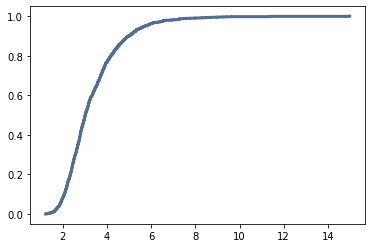

In [24]:
cdf = thinkstats2.Cdf(means)
thinkplot.Cdf(cdf)

In [25]:
n = [20, 200, 800]
meansLs = [0] * len(n)
rmseLs = [0] * len(n)

for i in range(len(n)):
    meansLs[i], rmseLs[i] = Estimate3(n[i])

sample mean lamda:  2.5141667043262546
rmse L 0.7495187311446573
sample mean lamda:  2.838019873027575
rmse L 0.21392363723519925
sample mean lamda:  2.8072549113503866
rmse L 0.10842028554718


Text(0, 0.5, 'Standard error (RMSE)')

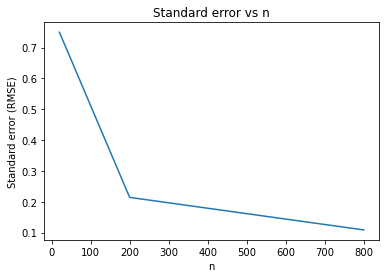

In [26]:
plt.plot(n, rmseLs)
plt.title('Standard error vs n')
plt.xlabel('n')
plt.ylabel('Standard error (RMSE)')